# Data analysis and visualization

### 1. Environment setup - initialization of Spark Session, installing libraries, and modules

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName('DataFrame') \
    .master('local[*]') \
    .getOrCreate()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
5,application_1685463224133_0006,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
%%configure -f
{
    "conf": {
        "spark.pyspark.python": "python3",
        "spark.pyspark.virtualenv.enabled": "true",
        "spark.pyspark.virtualenv.type":"native",
        "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv"
    }
}

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
6,application_1685463224133_0007,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
2,application_1685463224133_0003,pyspark,idle,Link,Link,None,
6,application_1685463224133_0007,pyspark,idle,Link,Link,None,✔


In [3]:
sc.install_pypi_package("pandas==1.0.5")
sc.install_pypi_package("matplotlib")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
# list installed packages

sc.list_packages()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- ----------
aws-cfn-bootstrap          2.0
beautifulsoup4             4.9.3
boto                       2.49.0
click                      8.1.3
cycler                     0.11.0
docutils                   0.14
fonttools                  4.38.0
jmespath                   1.0.1
joblib                     1.2.0
kiwisolver                 1.4.4
lockfile                   0.11.0
lxml                       4.9.2
matplotlib                 3.5.3
mysqlclient                1.4.2
nltk                       3.8
nose                       1.3.4
numpy                      1.20.0
packaging                  23.1
pandas                     1.0.5
Pillow                     9.5.0
pip                        20.2.2
py-dateutil                2.2
pyparsing                  3.0.9
pystache                   0.5.4
python-daemon              2.2.3
python-dateutil            2.8.2
python37-sagemaker-pyspark 1.4.2
pytz                       2022.7
PyYA

In [5]:
from pyspark.sql import Row
import pyspark.sql.functions as f
from pyspark.sql import Window
from pyspark.sql.functions import year
import matplotlib.pyplot as plt
from pyspark.ml.feature import StopWordsRemover
from pyspark.sql.functions import concat_ws

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### 2. Read Parquet files into DataFrames

In [6]:
Badges_DF = spark.read.parquet("s3://bigdata-parquet-data/Badges.parquet/")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
Comments_DF = spark.read.parquet("s3://bigdata-parquet-data/Comments.parquet/")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
PostHistory_DF = spark.read.parquet("s3://bigdata-parquet-data/PostHistory.parquet/")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
PostLinks_DF = spark.read.parquet("s3://bigdata-parquet-data/PostLinks.parquet/")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
Posts_DF = spark.read.parquet("s3://bigdata-parquet-data/Posts.parquet/")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
Tags_DF = spark.read.parquet("s3://bigdata-parquet-data/Tags.parquet/")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
Users_DF = spark.read.parquet("s3://bigdata-parquet-data/Users.parquet/")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
Votes_DF = spark.read.parquet("s3://bigdata-parquet-data/Votes.parquet/")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### 3. Analysis

### a) number of posts over time

In [14]:
# check first post creation date

Posts_DF.select("CreationDate").orderBy("CreationDate").show(1,truncate=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------------+
|CreationDate           |
+-----------------------+
|2016-01-12 18:45:19.963|
+-----------------------+
only showing top 1 row

In [15]:
# check last post creation date

Posts_DF.select("CreationDate").orderBy(Posts_DF.CreationDate.desc()).show(1,truncate=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------------+
|CreationDate           |
+-----------------------+
|2023-03-04 21:40:00.063|
+-----------------------+
only showing top 1 row

In [16]:
# add new column 'CreationYear' do Posts_DF DataFrame

Posts_DF2 = Posts_DF.withColumn("CreationYear",year(Posts_DF.CreationDate))
Posts_DF2.show(2,vertical=True,truncate=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 AcceptedAnswerId      | 51                                                                                                                                                                                                                                                                                          
 AnswerCount           | 2                                                                                                                                                                                                                                                                                           
 Body                  | When I've printed an object I've had to choos

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

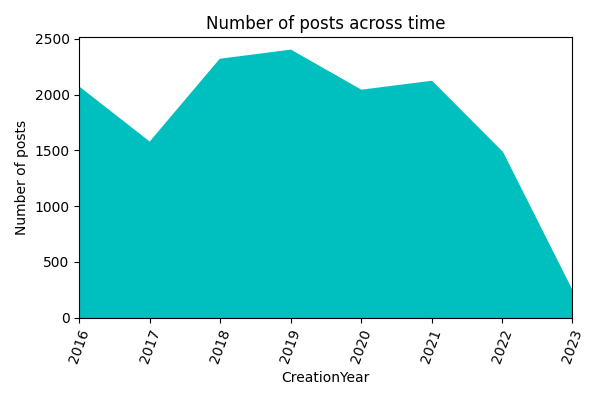

In [17]:
# create lineplot no.1

posts_count_over_time = Posts_DF2.groupBy("CreationYear").count().orderBy("CreationYear").toPandas()

plt.clf()
posts_count_over_time.plot(kind="area",x="CreationYear",y="count", rot=70, color="c", legend=None, figsize=(6,4))
plt.xticks(posts_count_over_time.CreationYear)
plt.xlim(2016, 2023)
plt.title("Number of posts across time")
plt.xlabel("CreationYear")
plt.ylabel("Number of posts")
plt.tight_layout()

%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

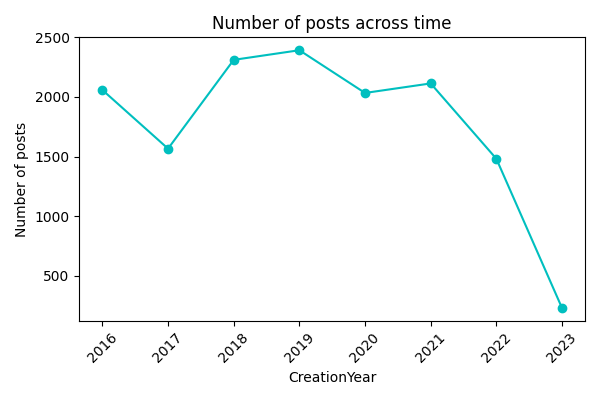

In [18]:
# create lineplot no.2

posts_count_over_time = Posts_DF2.groupBy("CreationYear").count().orderBy("CreationYear").toPandas()

plt.figure(figsize=(6,4))
plt.plot(posts_count_over_time["CreationYear"], posts_count_over_time["count"], color="c", marker='o')
plt.xlabel("CreationYear")
plt.ylabel("Number of posts")
plt.title("Number of posts across time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

%matplot plt

In [19]:
# count posts in each year

Posts_DF2.groupBy("CreationYear").count().orderBy("CreationYear").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+-----+
|CreationYear|count|
+------------+-----+
|        2016| 2059|
|        2017| 1566|
|        2018| 2312|
|        2019| 2393|
|        2020| 2034|
|        2021| 2114|
|        2022| 1481|
|        2023|  227|
+------------+-----+

### b) forum time of 10 longest active users (from the user's creation to the last post/comment), excluding bots

#### - bots detection 

In [20]:
# check AccountId's

Users_DF.select("AccountId").distinct().orderBy(f.asc("AccountId")).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+
|AccountId|
+---------+
|     null|
|       -1|
|        2|
|       75|
|       97|
|      150|
|      163|
|      168|
|      291|
|      331|
|      368|
|      451|
|      620|
|      646|
|      668|
|      746|
|      851|
|      932|
|      970|
|     1008|
+---------+
only showing top 20 rows

In [21]:
# based on aboves result, potentially AccountId== -1 is a bot, to confirm that check column "AboutMe" for those AccountId's

Users_DF.select("AboutMe").where(Users_DF.AccountId.like("-1")).show(4, vertical=True,truncate=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 AboutMe | Hi, I'm not really a person.I'm a background process that helps keep this site clean!I do things likeRandomly poke old unanswered questions every hour so they get some attentionOwn community questions and answers so nobody gets unnecessary reputation from themOwn downvotes on spam/evil posts that get permanently deletedOwn suggested edits from anonymous usersRemove abandoned questions

In [22]:
# check if bots are describing themselves in the most likely way (by using word "bot")

Users_DF.select("AccountId","AboutMe").where(Users_DF.AboutMe.like("% I am bot %")).show(truncate=False) 

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------+
|AccountId|AboutMe|
+---------+-------+
+---------+-------+

#### - count forum time 

In [23]:
# prepare 3 DataFrames for join (rename column names and reduce columns in DataFrame) 

Users_DF_to_join = Users_DF.select("Id","CreationDate").withColumnRenamed("Id","User_Id")\
                   .withColumnRenamed("CreationDate","User_CreationDate")

Comments_DF_to_join = Comments_DF.select("Id","CreationDate","PostId","UserId")\
                                 .withColumnRenamed("Id","Comment_Id")\
                                 .withColumnRenamed("CreationDate","Comment_CreationDate")\
                                 .withColumnRenamed("UserId","Comment_UserId")

Posts_DF_to_join = Posts_DF.select("Id","CreationDate").withColumnRenamed("Id","Post_Id")\
                           .withColumnRenamed("CreationDate","Post_CreationDate")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
# join above DataFrames into one DataFrame

UCP_join_DF = Users_DF_to_join.join(Comments_DF_to_join, Users_DF_to_join.User_Id==Comments_DF_to_join.Comment_UserId)\
                              .join(Posts_DF_to_join, Comments_DF_to_join.PostId==Posts_DF_to_join.Post_Id)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
# checking on NULL values

UCP_join_DF.where(UCP_join_DF.User_CreationDate.isNull()).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------+----------+--------------------+------+--------------+-------+-----------------+
|User_Id|User_CreationDate|Comment_Id|Comment_CreationDate|PostId|Comment_UserId|Post_Id|Post_CreationDate|
+-------+-----------------+----------+--------------------+------+--------------+-------+-----------------+
+-------+-----------------+----------+--------------------+------+--------------+-------+-----------------+

In [26]:
# extract difference in creation date between User_CreationDate and Comment_CreationDate/Post_CreationDate using Spark SQL

UCP_join_DF.createOrReplaceTempView("UCP_join_DF")

ForumTime_DF = spark.sql("SELECT User_Id, CASE WHEN DATEDIFF(DAY,User_CreationDate,Comment_CreationDate) > DATEDIFF(DAY,User_CreationDate,Post_CreationDate) THEN DATEDIFF(DAY,User_CreationDate,Comment_CreationDate) ELSE DATEDIFF(DAY,User_CreationDate,Post_CreationDate) END AS ForumTime FROM UCP_join_DF WHERE User_Id != '-1' ORDER BY ForumTime DESC")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
# add row number to ForumTime_DF using window function

windowSpec = Window.partitionBy("User_Id").orderBy(f.desc("ForumTime"))

ForumTime_DF2 = ForumTime_DF.withColumn("rownum", f.row_number()\
                                        .over(windowSpec)).orderBy(f.asc("rownum"),f.desc("ForumTime")).limit(10)

ForumTime_DF3 = ForumTime_DF2.select("User_Id","ForumTime").toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

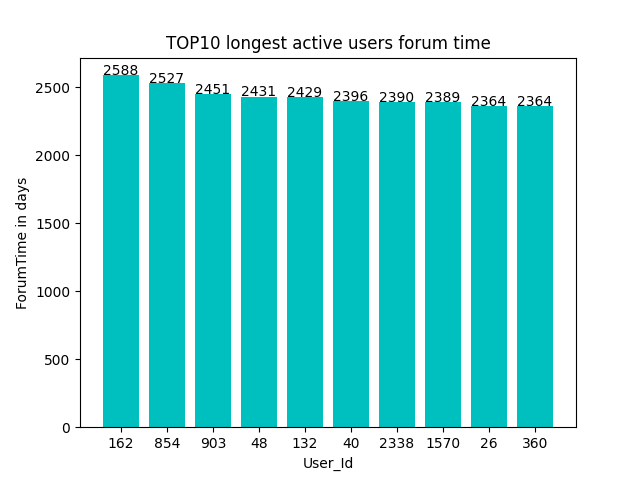

In [28]:
# create barplot

forum_time = ForumTime_DF3["ForumTime"]


fig, ax = plt.subplots()
ax.bar(range(len(ForumTime_DF3.User_Id)), ForumTime_DF3.ForumTime, width=0.8, color='c')

for i, v in enumerate(forum_time):
    ax.text(i, v + 0.5, str(v), ha="center")

ax.set_title("TOP10 longest active users forum time")
ax.set_xlabel("User_Id")
ax.set_ylabel("ForumTime in days")
ax.set_xticks(range(len(ForumTime_DF3.User_Id)))
ax.set_xticklabels(ForumTime_DF3.User_Id)

    
%matplot plt

In [29]:
# compare barplot with DataFrame

ForumTime_DF2.select("User_Id","ForumTime").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+---------+
|User_Id|ForumTime|
+-------+---------+
|    162|     2588|
|    854|     2527|
|    903|     2451|
|     48|     2431|
|    132|     2429|
|     40|     2396|
|   2338|     2390|
|   1570|     2389|
|     26|     2364|
|    360|     2364|
+-------+---------+

### c) comparison of the highest and lowest rated questions (length, tags, number of answers)

In [30]:
# check max&min questions score (qestions: PostTypeId==1)

Posts_DF.where(Posts_DF.PostTypeId==1).select(f.max(Posts_DF.Score),f.min(Posts_DF.Score)).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+----------+
|max(Score)|min(Score)|
+----------+----------+
|        59|        -5|
+----------+----------+

In [31]:
# collect records with max&min "Score" values

Posts_DF_max = Posts_DF.where(Posts_DF.PostTypeId==1).agg(f.max("Score")).collect()[0][0]
Posts_DF_min = Posts_DF.where(Posts_DF.PostTypeId==1).agg(f.min("Score")).collect()[0][0]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
Posts_DF_questions = Posts_DF.select("Id","PostTypeID","Body","AnswerCount","Tags","Score")\
                             .filter((f.col("Score") == Posts_DF_max) | (f.col("Score") == Posts_DF_min))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [33]:
# add new columns - question length and tags count

Posts_DF_all=Posts_DF_questions.withColumn("BodyLength",f.length(Posts_DF_questions.Body))\
                               .withColumn("TagsCount",f.size(f.split(f.col("Tags"), ",")).alias("TagCount"))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [34]:
Posts_DF_all.select("Id","PostTypeID","BodyLength","Score","Tags","TagsCount","AnswerCount").show(truncate=False) 

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+----------+----------+-----+------------------------------------+---------+-----------+
|Id |PostTypeID|BodyLength|Score|Tags                                |TagsCount|AnswerCount|
+---+----------+----------+-----+------------------------------------+---------+-----------+
|11 |1         |231       |59   |filament,pla,post-processing,surface|4        |9          |
|28 |1         |223       |-5   |cost,estimation                     |2        |1          |
+---+----------+----------+-----+------------------------------------+---------+-----------+

### d) percentage of cases where the highest-rated answer is unaccepted answer

In [35]:
# create answers DatFrame (answers: PostTypeId==2)

Posts_DF_A=Posts_DF.select(f.col("Id").alias("AnswerId"),f.col("Score").alias("AnswerScore")\
                           ,f.col("ParentId").alias("QuestionId")).where(Posts_DF.PostTypeId==2)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
# create questions with answers DataFrame (qestions: PostTypeId==1)

Posts_DF_Q = Posts_DF.select(f.col("Id").alias("QuestionId"),f.col("Score").alias("QuestionScore")\
                             ,"AcceptedAnswerId").where(Posts_DF.PostTypeId==1)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
# join questions DF and answers DF

Posts_DF_QA = Posts_DF_Q.join(Posts_DF_A, Posts_DF_Q.QuestionId==Posts_DF_A.QuestionId)\
              .select(Posts_DF_Q.QuestionId,"AcceptedAnswerId","AnswerId","AnswerScore").orderBy(f.asc("QuestionId"))

Posts_DF_QA.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+----------------+--------+-----------+
|QuestionId|AcceptedAnswerId|AnswerId|AnswerScore|
+----------+----------------+--------+-----------+
|         1|              51|      51|          8|
|         1|              51|    4853|          2|
|         2|              12|       9|         18|
|         2|              12|     176|         10|
|         2|              12|      12|         23|
|         2|              12|      15|          5|
|         3|             152|     152|          9|
|         3|             152|    2803|          1|
|         3|             152|     145|          7|
|         4|            1289|    1289|          6|
|         4|            1289|      17|          5|
|         4|            1289|     248|          5|
|         4|            1289|    1288|          4|
|         5|              77|    1050|          8|
|         5|              77|    1060|          2|
|         5|              77|    1095|          3|
|         5|              77|  

In [38]:
# add row number to Posts_DF_QA

windowSpec = Window.partitionBy("QuestionId").orderBy(f.desc("AnswerScore"))
Posts_DF_QA_RN = Posts_DF_QA.withColumn("row_num",f.row_number().over(windowSpec))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [39]:
# count highest scored not accepted answers

Q_notAccepted_HS = Posts_DF_QA_RN.where((Posts_DF_QA_RN.AcceptedAnswerId.isNull()) & (Posts_DF_QA_RN.row_num==1)).count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
# count all questions with answers

QA_all = Posts_DF.where((Posts_DF.AnswerCount > 0) & (Posts_DF.PostTypeId==1)).count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [41]:
result=round((Q_notAccepted_HS/QA_all*100),2)
print(f"Percentage of cases where the highest-rated answer is unaccepted answer: {result}%")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Percentage of cases where the highest-rated answer is unaccepted answer: 48.56%

### e) distribution of accepted answers vs. other answers (avg, deviation, min, max)

#### based on Posts_DF_QA DataFrame from point d

In [42]:
# accepted answers

A_accepted = Posts_DF_QA.where(Posts_DF_QA.AcceptedAnswerId.isNotNull()).\
                  select(f.max(Posts_DF_QA.AnswerScore).alias("max_score"),\
                  f.min(Posts_DF_QA.AnswerScore).alias("min_score"),\
                  f.avg(Posts_DF_QA.AnswerScore).alias("avg_score"),\
                  f.stddev(Posts_DF_QA.AnswerScore).alias("std_score"))\
                  .withColumn("answers type", f.lit("accepted"))

A_accepted2 = A_accepted.select("answers type","max_score","min_score",f.round("avg_score",scale=2)\
                                .alias("avg_score"),f.round("std_score",scale=2).alias("std_score"))

A_accepted2.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+---------+---------+---------+---------+
|answers type|max_score|min_score|avg_score|std_score|
+------------+---------+---------+---------+---------+
|    accepted|       50|       -4|     3.04|     3.55|
+------------+---------+---------+---------+---------+

In [43]:
# not accepted answers

A_not_accepted = Posts_DF_QA.where(Posts_DF_QA.AcceptedAnswerId.isNull()).\
                  select(f.max(Posts_DF_QA.AnswerScore).alias("max_score"),\
                  f.min(Posts_DF_QA.AnswerScore).alias("min_score"),\
                  f.avg(Posts_DF_QA.AnswerScore).alias("avg_score"),\
                  f.stddev(Posts_DF_QA.AnswerScore).alias("std_score"))\
                  .withColumn("answers type", f.lit("not accepted"))

A_not_accepted2 = A_not_accepted.select("answers type","max_score","min_score",f.round("avg_score",scale=2)\
                                        .alias("avg_score"),f.round("std_score",scale=2).alias("std_score"))

A_not_accepted2.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+---------+---------+---------+---------+
|answers type|max_score|min_score|avg_score|std_score|
+------------+---------+---------+---------+---------+
|not accepted|       20|       -6|     1.85|     1.96|
+------------+---------+---------+---------+---------+

In [44]:
# dsiplay above DataFrames together

DF_final = A_accepted2.union(A_not_accepted2)
DF_final.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+---------+---------+---------+---------+
|answers type|max_score|min_score|avg_score|std_score|
+------------+---------+---------+---------+---------+
|    accepted|       50|       -4|     3.04|     3.55|
|not accepted|       20|       -6|     1.85|     1.96|
+------------+---------+---------+---------+---------+

### f) top N tags that generated the most views

In [45]:
# get TOP 10 tags with most views - first method

Tags_view = Posts_DF.select("Tags","ViewCount").orderBy(f.desc("ViewCount")).limit(10)
Tags_view.show(truncate=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------------+---------+
|Tags                                                   |ViewCount|
+-------------------------------------------------------+---------+
|marlin,creality-ender-3,homing                         |123629   |
|maintenance                                            |114469   |
|filament,pla,post-processing,surface                   |93372    |
|creality-ender-3,cost                                  |89424    |
|rafts,brims                                            |81936    |
|nozzle,y-axis,creality-ender-3                         |74631    |
|g-code                                                 |74128    |
|pla,heated-bed,warping                                 |69716    |
|calibration                                            |69525    |
|heated-bed,calibration,build-plate,knowledgebase,homing|69186    |
+-------------------------------------------------------+---------+

In [46]:
# get TOP 10 tags with most views - second method using Spark SQL

Posts_DF.createOrReplaceTempView("Posts_DF")

spark.sql("SELECT Tags,ViewCount FROM Posts_DF ORDER BY ViewCount DESC").show(10, truncate=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------------+---------+
|Tags                                                   |ViewCount|
+-------------------------------------------------------+---------+
|marlin,creality-ender-3,homing                         |123629   |
|maintenance                                            |114469   |
|filament,pla,post-processing,surface                   |93372    |
|creality-ender-3,cost                                  |89424    |
|rafts,brims                                            |81936    |
|nozzle,y-axis,creality-ender-3                         |74631    |
|g-code                                                 |74128    |
|pla,heated-bed,warping                                 |69716    |
|calibration                                            |69525    |
|heated-bed,calibration,build-plate,knowledgebase,homing|69186    |
+-------------------------------------------------------+---------+
only showing top 10 rows

### g) number of posts over time for each of the top N tags (lineplot/barplot)

In [47]:
# check TOP 3 tags

Tags_DF_TOP3=Tags_DF.select("TagName","Count").orderBy(Tags_DF.Count.desc()).limit(3)
Tags_DF_TOP3.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+-----+
|         TagName|Count|
+----------------+-----+
|creality-ender-3|  673|
|          marlin|  490|
|   print-quality|  471|
+----------------+-----+

In [48]:
# add "CreationYear" column to Posts_DF
 
Posts_DF_year = Posts_DF.withColumn("CreationYear",year(Posts_DF.CreationDate))
Posts_DF_year.show(2,vertical=True,truncate=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 AcceptedAnswerId      | 51                                                                                                                                                                                                                                                                                          
 AnswerCount           | 2                                                                                                                                                                                                                                                                                           
 Body                  | When I've printed an object I've had to choos

In [49]:
# reduce number of columns (can be skipped)

Posts_DF_year2=Posts_DF_year.select("Tags","CreationYear")
Posts_DF_year2.show(truncate=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------+------------+
|Tags                                    |CreationYear|
+----------------------------------------+------------+
|resolution,speed,quality                |2016        |
|print-material,safety,health            |2016        |
|quality,resolution                      |2016        |
|fdm,material,print-material,metal-parts |2016        |
|filament,abs,fdm,pla                    |2016        |
|filament,makerbot,dual-nozzle,color     |2016        |
|null                                    |2016        |
|null                                    |2016        |
|null                                    |2016        |
|material,fdm,outdoors                   |2016        |
|filament,pla,post-processing,surface    |2016        |
|null                                    |2016        |
|quality,resolution,fdm                  |2016        |
|filament,metal-parts                    |2016        |
|null                                    |2016  

In [50]:
# create DataFrames for each of TOP 3 tags

posts_count_over_time_top1 = Posts_DF_year.where(Posts_DF_year.Tags.like("%creality-ender-3%"))\
                                           .groupBy("CreationYear").count().orderBy("CreationYear").toPandas()

posts_count_over_time_top2 = Posts_DF_year.where(Posts_DF_year.Tags.like("%marlin%"))\
                                           .groupBy("CreationYear").count().orderBy("CreationYear").toPandas()

posts_count_over_time_top3 = Posts_DF_year.where(Posts_DF_year.Tags.like("%print-quality%"))\
                                           .groupBy("CreationYear").count().orderBy("CreationYear").toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

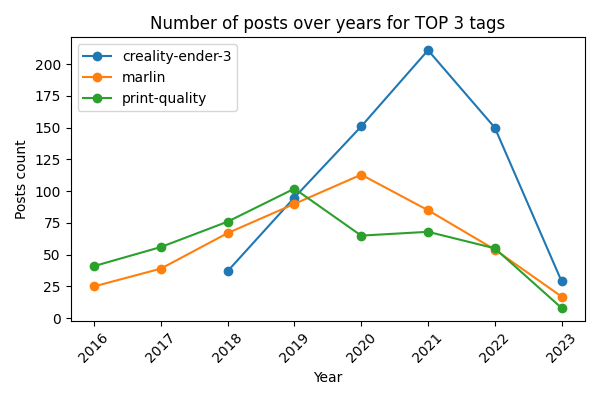

In [51]:
# lineplot

plt.figure(figsize=(6,4))
plt.plot(posts_count_over_time_top1["CreationYear"], posts_count_over_time_top1["count"], marker='o', label="creality-ender-3")
plt.plot(posts_count_over_time_top2["CreationYear"], posts_count_over_time_top2["count"], marker='o', label="marlin")
plt.plot(posts_count_over_time_top3["CreationYear"], posts_count_over_time_top3["count"], marker='o', label="print-quality")
plt.xlabel("Year")
plt.ylabel("Posts count")
plt.title("Number of posts over years for TOP 3 tags")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()
%matplot plt

### h) most frequently appearing words in titles (excluding stopwords)

In [52]:
# clean "Title" column, transform string into array

Posts_DF_array = Posts_DF.withColumn("Title",f.regexp_replace("Title","\?",""))\
                           .withColumn("Title",f.regexp_replace("Title","\"",""))\
                           .select(f.split(f.col("Title")," ").alias("TitleArray"))\
                           .drop("Title").dropna()


Posts_DF_array.printSchema()

Posts_DF_array.show(10,truncate=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- TitleArray: array (nullable = true)
 |    |-- element: string (containsNull = false)

+--------------------------------------------------------------------------------------------+
|TitleArray                                                                                  |
+--------------------------------------------------------------------------------------------+
|[How, to, obtain, high, resolution, prints, in, a, shorter, period, of, time]               |
|[Is, 3D, printing, safe, for, your, health]                                                 |
|[How, important, is, the, minimum, layer, height, on, a, 3d, printer]                       |
|[Are, there, any, metals, that, exhibit, a, large, glass, state]                            |
|[How, is, PLA, different, from, ABS, material]                                              |
|[Multi-color, printing, with, desktop, 3D, printer]                                         |
|[3D, printing, for, outdoor, use:, What, types, 

In [53]:
#stopwords remover

swr = StopWordsRemover(inputCol="TitleArray", outputCol="TitleCleaned")

Posts_DF_clean = swr.transform(Posts_DF_array)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [54]:
Posts_DF_clean.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|          TitleArray|        TitleCleaned|
+--------------------+--------------------+
|[How, to, obtain,...|[obtain, high, re...|
|[Is, 3D, printing...|[3D, printing, sa...|
|[How, important, ...|[important, minim...|
|[Are, there, any,...|[metals, exhibit,...|
|[How, is, PLA, di...|[PLA, different, ...|
|[Multi-color, pri...|[Multi-color, pri...|
|[3D, printing, fo...|[3D, printing, ou...|
|[How, do, I, give...|[give, 3D-printed...|
|[Resolution, Draw...|[Resolution, Draw...|
|[How, to, print, ...|[print, metal-lik...|
|[Are, there, any,...|[ways, make, 3D, ...|
|[How, to, easily,...|[easily, get, rid...|
|[What, are, main,...|[main, difference...|
|[Is, the, weather...|[weather, problem...|
|[How, to, 3D, pri...|   [3D, print, bike]|
|[How, many, times...|[many, times, pri...|
|[Printing, Plasti...|[Printing, Plasti...|
|[Conversion, of, ...|[Conversion, 3, m...|
|[Alternatives, to...|[Alternatives, Re...|
|[What, are, the, ...|[reasons, 

In [55]:
# add new string column "TitleCleaned" and remove column "TitleAarray"

Posts_DF_clean2 = Posts_DF_clean.withColumn("TitleCleaned",concat_ws(",",f.col("TitleCleaned"))).drop("TitleArray").dropna()
Posts_DF_clean2.printSchema()
Posts_DF_clean2.show(5,truncate=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- TitleCleaned: string (nullable = false)

+-------------------------------------------------+
|TitleCleaned                                     |
+-------------------------------------------------+
|obtain,high,resolution,prints,shorter,period,time|
|3D,printing,safe,health                          |
|important,minimum,layer,height,3d,printer        |
|metals,exhibit,large,glass,state                 |
|PLA,different,ABS,material                       |
+-------------------------------------------------+
only showing top 5 rows

In [56]:
# explode and split "TitleCleaned" to count most-appearing words

Posts_DFF = Posts_DF_clean2.withColumn("MostAppearing", f.explode(f.split(f.col("TitleCleaned"), ",")))\
  .groupBy("MostAppearing")\
  .count()\
  .sort("count", ascending=False)


Posts_DFF.show(15)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+-----+
|MostAppearing|count|
+-------------+-----+
|           3D|  542|
|        print|  519|
|             |  415|
|        Ender|  403|
|            3|  384|
|     printing|  379|
|      printer|  364|
|          bed|  339|
|     filament|  222|
|        layer|  197|
|       Marlin|  177|
|            -|  167|
|     extruder|  163|
|          PLA|  160|
|         Cura|  149|
+-------------+-----+
only showing top 15 rows

In [57]:
# exclude "-" and NULL values, reduce output to TOP 15 words

Posts_DFF2 = Posts_DFF.filter((Posts_DFF.MostAppearing != "")&(Posts_DFF.MostAppearing != "-")\
                              &(Posts_DFF.MostAppearing != "3")).limit(15)
Posts_DFF2.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+-----+
|MostAppearing|count|
+-------------+-----+
|           3D|  542|
|        print|  519|
|        Ender|  403|
|     printing|  379|
|      printer|  364|
|          bed|  339|
|     filament|  222|
|        layer|  197|
|       Marlin|  177|
|     extruder|  163|
|          PLA|  160|
|         Cura|  149|
|       prints|  144|
|       nozzle|  139|
|          use|  133|
+-------------+-----+

### i) percentage of users who have never posted anything

In [58]:
# register temp tables

PostHistory_DF.createOrReplaceTempView("PostHistory_DF")
Users_DF.createOrReplaceTempView("Users_DF")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [59]:
# count number of users without any posts

Users_without_posts=spark.sql("SELECT DISTINCT(Id) FROM Users_DF WHERE Id NOT IN\
(SELECT DISTINCT(UserId) FROM PostHistory_DF)").count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [60]:
# count all users

Users_all=Users_DF.select("Id").distinct().count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [61]:
result=round((Users_without_posts/Users_all*100),2)
print(f"Percentage of users who have never posted anything: {result}%")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Percentage of users who have never posted anything: 85.39%

### j) average time from the appearance of the question to the appearance of the accepted answer

In [62]:
# posts with accepted answers

Questions_DF = Posts_DF.select(f.col("Id").alias("Post_Id"),f.col("CreationDate")\
                               .alias("Post_CreationDate"),"AcceptedAnswerId")\
                               .where((Posts_DF.PostTypeId==1)&(Posts_DF.AcceptedAnswerId.isNotNull()))

Questions_DF.show(truncate=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------------+----------------+
|Post_Id|Post_CreationDate      |AcceptedAnswerId|
+-------+-----------------------+----------------+
|1      |2016-01-12 18:45:19.963|51              |
|2      |2016-01-12 18:45:51.287|12              |
|3      |2016-01-12 18:46:22.083|152             |
|4      |2016-01-12 18:50:55.973|1289            |
|5      |2016-01-12 18:53:53.623|77              |
|6      |2016-01-12 18:57:13.35 |27              |
|11     |2016-01-12 19:07:53.343|34              |
|13     |2016-01-12 19:18:57.943|63              |
|14     |2016-01-12 19:22:14.277|47              |
|16     |2016-01-12 19:25:52.27 |88              |
|19     |2016-01-12 19:28:09.363|62              |
|20     |2016-01-12 19:30:45.06 |60              |
|22     |2016-01-12 19:33:04.263|26              |
|28     |2016-01-12 19:39:43.65 |32              |
|33     |2016-01-12 19:52:25.43 |39              |
|38     |2016-01-12 19:59:15.953|43              |
|48     |2016-01-12 20:16:01.82

In [63]:
# all answers

Answers_DF = Posts_DF.select(f.col("Id").alias("Answer_Id"),f.col("CreationDate")\
                             .alias("Answer_CreationDate"),f.col("ParentId").alias("Question_Id")).where(Posts_DF.PostTypeId==2)
Answers_DF.show(truncate=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----------------------+-----------+
|Answer_Id|Answer_CreationDate    |Question_Id|
+---------+-----------------------+-----------+
|9        |2016-01-12 18:58:04.41 |2          |
|12       |2016-01-12 19:13:00.71 |2          |
|15       |2016-01-12 19:25:07.817|2          |
|17       |2016-01-12 19:27:20.113|4          |
|18       |2016-01-12 19:28:04.263|10         |
|21       |2016-01-12 19:32:33.503|11         |
|23       |2016-01-12 19:34:41.753|16         |
|26       |2016-01-12 19:37:25.013|22         |
|27       |2016-01-12 19:38:26.67 |6          |
|29       |2016-01-12 19:45:28.083|16         |
|31       |2016-01-12 19:47:15.65 |11         |
|32       |2016-01-12 19:49:01.35 |28         |
|34       |2016-01-12 19:54:46.6  |11         |
|36       |2016-01-12 19:58:17.79 |11         |
|37       |2016-01-12 19:59:01.223|33         |
|39       |2016-01-12 20:00:22.177|33         |
|41       |2016-01-12 20:02:33.247|35         |
|42       |2016-01-12 20:05:08.103|38   

In [64]:
# left join questions DF with answers DFto get only accepted answers

QA_DF = Questions_DF.join(Answers_DF, Questions_DF.AcceptedAnswerId == Answers_DF.Answer_Id,how = "left")
QA_DF.orderBy(f.asc("Post_Id")).show(truncate=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------------+----------------+---------+-----------------------+-----------+
|Post_Id|Post_CreationDate      |AcceptedAnswerId|Answer_Id|Answer_CreationDate    |Question_Id|
+-------+-----------------------+----------------+---------+-----------------------+-----------+
|1      |2016-01-12 18:45:19.963|51              |51       |2016-01-12 20:20:17.79 |1          |
|2      |2016-01-12 18:45:51.287|12              |12       |2016-01-12 19:13:00.71 |2          |
|3      |2016-01-12 18:46:22.083|152             |152      |2016-01-13 06:39:29.06 |3          |
|4      |2016-01-12 18:50:55.973|1289            |1289     |2016-06-09 19:34:53.96 |4          |
|5      |2016-01-12 18:53:53.623|77              |77       |2016-01-12 21:29:04.42 |5          |
|6      |2016-01-12 18:57:13.35 |27              |27       |2016-01-12 19:38:26.67 |6          |
|11     |2016-01-12 19:07:53.343|34              |34       |2016-01-12 19:54:46.6  |11         |
|13     |2016-01-12 19:18:57.9

In [65]:
# exclude NULL values

QA_DF2 = QA_DF.where(QA_DF.Answer_Id.isNotNull())

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [66]:
# count difference between Post_CreationDate and Answer_CreationDate

QA_DF3 = QA_DF2.withColumn("difference",(f.unix_timestamp(QA_DF2.Answer_CreationDate)-\
                                         f.unix_timestamp(QA_DF2.Post_CreationDate)))

QA_DF3.orderBy(f.desc("difference")).show(vertical=True,truncate=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0--------------------------------------
 Post_Id             | 8605                    
 Post_CreationDate   | 2019-04-02 21:07:45.463 
 AcceptedAnswerId    | 19013                   
 Answer_Id           | 19013                   
 Answer_CreationDate | 2022-02-24 21:21:03.8   
 Question_Id         | 8605                    
 difference          | 91498398                
-RECORD 1--------------------------------------
 Post_Id             | 3015                    
 Post_CreationDate   | 2016-11-03 21:36:24.987 
 AcceptedAnswerId    | 8287                    
 Answer_Id           | 8287                    
 Answer_CreationDate | 2019-02-16 14:56:39.56  
 Question_Id         | 3015                    
 difference          | 72120015                
-RECORD 2--------------------------------------
 Post_Id             | 13523                   
 Post_CreationDate   | 2020-04-25 18:30:09.507 
 AcceptedAnswerId    | 19105                   
 Answer_Id           | 19105            

In [67]:
# count average difference 

QA_avg_dif = QA_DF3.select(f.round((f.avg("difference")/86400),scale=2).alias("Average Accepted Answer Creation Time [days]"))
QA_avg_dif.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------+
|Average Accepted Answer Creation Time [days]|
+--------------------------------------------+
|                                       12.21|
+--------------------------------------------+